useful info:
    animated histograms: https://stackoverflow.com/questions/42910622/animation-of-histograms-in-subplot?rq=1

In [12]:
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt


       rep    t  pop1  pop2     k1   k2
0        1    1  1000     0   0.24 -1.0
1        1    2  1000     0   0.47 -1.0
2        1    3  1000     0   0.71 -1.0
3        1    4  1000     0   0.91 -1.0
4        1    5  1000     0   1.06 -1.0
5        1    6  1000     0   1.21 -1.0
6        1    7  1000     0   1.38 -1.0
7        1    8  1000     0   1.55 -1.0
8        1    9  1000     0   1.65 -1.0
9        1   10  1000     0   1.83 -1.0
10       1   11  1000     0   2.09 -1.0
11       1   12  1000     0   2.23 -1.0
12       1   13  1000     0   2.37 -1.0
13       1   14  1000     0   2.47 -1.0
14       1   15  1000     0   2.71 -1.0
15       1   16  1000     0   2.90 -1.0
16       1   17  1000     0   2.84 -1.0
17       1   18  1000     0   2.90 -1.0
18       1   19  1000     0   2.96 -1.0
19       1   20  1000     0   3.05 -1.0
20       1   21  1000     0   3.12 -1.0
21       1   22  1000     0   3.26 -1.0
22       1   23  1000     0   3.23 -1.0
23       1   24  1000     0   3.25 -1.0


/home/hyunseok/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


no back mutation (mu=0.00080)
pop1 died 0 times
pop2 died 0 times


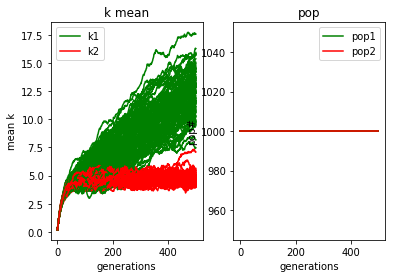

back mutation (mu=0.00080)
pop1 died 0 times
pop2 died 0 times


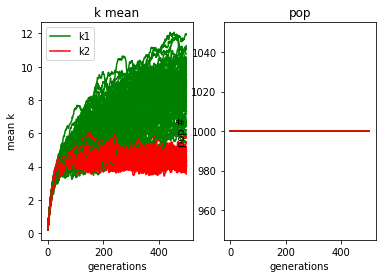

In [9]:
%matplotlib inline
mu = [str(np.round(i,5))+'0' for i in np.linspace(0.0002,0.0012,11)]
mu[8]=mu[8]+'0'
mu = ['0.00080']
for mut in mu:
    

    #strings = ['./back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #         './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]

    
    #strings = ['./back_test2/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #         './back_test2/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    
    strings = ['./back_test2_1.3py/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
              './back_test2_1.3py/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
              './back_test2_1.3py/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
              './back_test2_1.3py/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    # no back
    data_a = pandas.read_csv(strings[0])
    data_b = pandas.read_csv(strings[2])
    print(data_a)
    print(data_b)
    reps = list(set(data_a['rep']))  
    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')

    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g',label='pop1')
    plt.plot(list(data_b2['pop2']),'r',label='pop2')
    plt.legend()
    plt.ylabel('pop#')
    plt.xlabel('generations')
    plt.title('pop')
    pop1dead = 0
    pop2dead = 0
    for i in reps:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('no back mutation (mu=%s)'%(mut))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()
    # back
    data_a = pandas.read_csv(strings[1])
    data_b = pandas.read_csv(strings[3])

    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')
    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g')
    plt.plot(list(data_b2['pop2']),'r')
    plt.ylabel('pop #')
    plt.xlabel('generations')
    plt.title('pop')
    
    pop1dead = 0
    pop2dead = 0
    for i in reps[1::]:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('back mutation (mu=%s)'%(mut))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()

/home/hyunseok/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


no back (mu=0.00080)
pop1 died 0 times
pop2 died 0 times


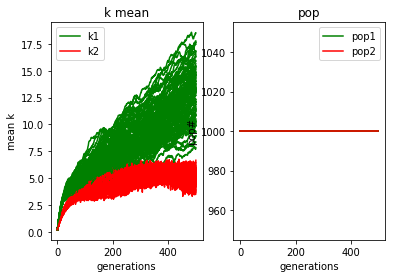

back (mu=0.00080)
pop1 died 0 times
pop2 died 0 times


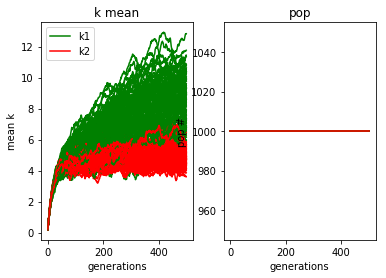

In [10]:
mu = [str(np.round(i,5))+'0' for i in np.linspace(0.0002,0.0012,11)]
mu[8]=mu[8]+'0'
mu = ['0.00080']
for mut in mu:
    

    #strings = ['./back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #         './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]

    
    #strings = ['./back_test2/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #         './back_test2/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    
    strings = ['./back_test2_1.3c/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
              './back_test2_1.3c/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
              './back_test2_1.3c/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
              './back_test2_1.3c/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    # no back
    data_a = pandas.read_csv(strings[0])
    data_b = pandas.read_csv(strings[2])
    reps = list(set(data_a['rep']))  
    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')

    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g',label='pop1')
    plt.plot(list(data_b2['pop2']),'r',label='pop2')
    plt.legend()
    plt.ylabel('pop#')
    plt.xlabel('generations')
    plt.title('pop')
    pop1dead = 0
    pop2dead = 0
    for i in reps:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('no back (mu=%s)'%(mut))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()
    # back
    data_a = pandas.read_csv(strings[1])
    data_b = pandas.read_csv(strings[3])

    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')
    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g')
    plt.plot(list(data_b2['pop2']),'r')
    plt.ylabel('pop #')
    plt.xlabel('generations')
    plt.title('pop')
    
    pop1dead = 0
    pop2dead = 0
    for i in reps[1::]:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pocatp2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('back (mu=%s)'%(mut))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()

/home/hyunseok/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


no back mutation (n1r=0.20)
pop1 died 99 times
pop2 died 6 times


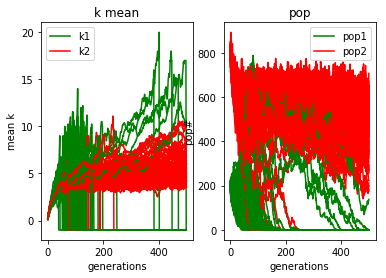

no back mutation (n1r=0.80)
pop1 died 89 times
pop2 died 61 times


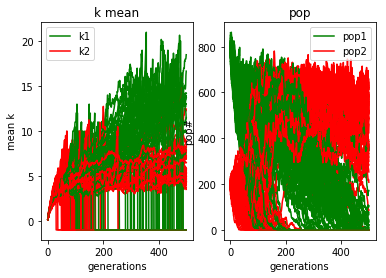

In [11]:
pop = [1,2] # string 1 or 2
#mu = [str(np.round(i,5))+'0' for i in np.linspace(0.0002,0.0012,11)]
#mu[8]=mu[8]+'0'
n1r = ['0.10','0.20','0.30','0.40','0.50','0.60','0.70','0.80','0.90']
n1r = ['0.20','0.80']
for ratio in n1r:
    

    #strings = ['./back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #         './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]

    
    strings = ['./ratio_test/c1.2s_0,100,300,0.05,1000,1000,0.00070,500,0.00,0.50,%s(0).csv'%(ratio),
             './ratio_test/c1.2s_1,100,300,0.05,1000,1000,0.00070,500,0.00,0.50,%s(0).csv'%(ratio),
              './ratio_test/c1.2s_0,100,300,0.05,1000,1000,0.00070,500,0.00,0.50,%s(0).csv'%(ratio),
              './ratio_test/c1.2s_1,100,300,0.05,1000,1000,0.00070,500,0.00,0.50,%s(0).csv'%(ratio)
              ]
    
    #strings = ['./back_test2_1.3c/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.3c/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.3c/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2_1.3c/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    # no back
    
    data_a = pandas.read_csv(strings[0])
    data_b = pandas.read_csv(strings[2])
    reps = list(set(data_a['rep']))  
    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')

    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g',label='pop1')
    plt.plot(list(data_b2['pop2']),'r',label='pop2')
    plt.legend()
    plt.ylabel('pop#')
    plt.xlabel('generations')
    plt.title('pop')
    pop1dead = 0
    pop2dead = 0
    for i in reps:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('no back mutation (n1r=%s)'%(ratio))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()
    """
    # back
    #data_a = pandas.read_csv(strings[1])
    #data_b = pandas.read_csv(strings[3])

    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')
    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g')
    plt.plot(list(data_b2['pop2']),'r')
    plt.ylabel('pop #')
    plt.xlabel('generations')
    plt.title('pop')
    
    pop1dead = 0
    pop2dead = 0
    for i in reps[1::]:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('back mutation (n1r=%s)'%(ratio))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()
    """

./drift_test_1.3c/c1.3s_0,100,300,0.05,10000,10000,0.00080,500,0.00,0.50,1.00(0).csv
./drift_test_1.3c/c1.3s_0,100,300,0.05,10000,10000,0.00080,500,0.00,0.50,0.00(0).csv


/home/hyunseok/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


no back mutation (N0=10000)
pop1 died 0 times
pop2 died 0 times


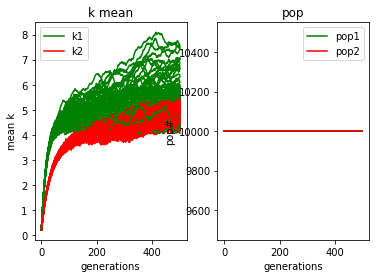

./drift_test_1.3c/c1.3s_0,100,300,0.05,100000,100000,0.00080,500,0.00,0.50,1.00(0).csv
./drift_test_1.3c/c1.3s_0,100,300,0.05,100000,100000,0.00080,500,0.00,0.50,0.00(0).csv
no back mutation (N0=100000)
pop1 died 0 times
pop2 died 0 times


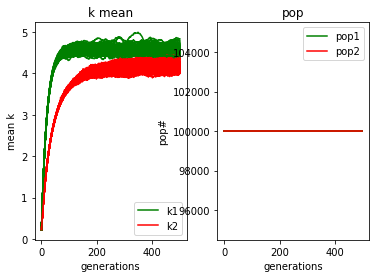

./drift_test_1.3c/c1.3s_0,100,300,0.05,200000,200000,0.00080,500,0.00,0.50,1.00(0).csv
./drift_test_1.3c/c1.3s_0,100,300,0.05,200000,200000,0.00080,500,0.00,0.50,0.00(0).csv
no back mutation (N0=200000)
pop1 died 0 times
pop2 died 0 times


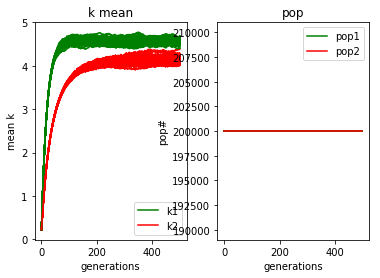

In [23]:
N0 = ['10000','100000','200000']
for n0 in N0:
    #strings = ['./back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #         './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2_1.2c/c1.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]

    
    strings = ['./drift_test_1.3c/c1.3s_0,100,300,0.05,%s,%s,0.00080,500,0.00,0.50,1.00(0).csv'%(n0,n0),
              './drift_test_1.3c/c1.3s_0,100,300,0.05,%s,%s,0.00080,500,0.00,0.50,0.00(0).csv'%(n0,n0)
              ]
    #strings = ['./back_test2_1.3c/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.3c/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
    #          './back_test2_1.3c/c1.3s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
    #          './back_test2_1.3c/c1.3s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    # no back
    print(strings[0])
    print(strings[1])
    data_a = pandas.read_csv(strings[0])
    data_b = pandas.read_csv(strings[1])
    reps = list(set(data_a['rep']))  
    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.subplot(121)
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    plt.title('k mean')

    plt.subplot(122)
    plt.plot(list(data_a2['pop1']),'g',label='pop1')
    plt.plot(list(data_b2['pop2']),'r',label='pop2')
    plt.legend()
    plt.ylabel('pop#')
    plt.xlabel('generations')
    plt.title('pop')
    pop1dead = 0
    pop2dead = 0
    for i in reps:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.subplot(121)
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.subplot(122)
        plt.plot(list(data_a2['pop1']),'g')
        plt.plot(list(data_b2['pop2']),'r')
    print('no back mutation (N0=%s)'%(n0))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()

In [22]:
3%2

1

In [8]:
## for back_test data
# change string of k2 data into integer list
pop = '1' # string 1 or 2
data = pandas.read_csv('./back_test/c1.2.2s_0,20,300,0.05,1000,1000,0.00060,500,0.00,0.50,1.00(0).csv')
for j in range(len(data['k'+pop])):
    data['k'+pop][j] = data['k'+pop][j].split('.')
    for i in range(len(data['k'+pop][j])):
        if data['k'+pop][j][i] != "'NA'": 
            data['k'+pop][j][i] = int(data['k'+pop][j][i])

%matplotlib inline

data2 = data.loc[data['rep']==1]
plt.plot(data2['pop'+pop])
plt.show()
for i in range(len(data2['k'+pop])):
    plt.figure(i)
    print('gen%d'%(i+1))
    print('pop#=%d'%(data2['pop'+pop][i]))
    plt.ylim((0,1100))
    plt.hist(data2['k'+pop][i],range=(0,20))
    plt.show()

/home/hyunseok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
